# Naive Bayes on MNIST Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

### Dataset Preparation

In [2]:
# Load The Sklearn MNIST Dataset
digits = load_digits()

In [3]:
X = digits.data
Y = digits.target

In [4]:
print(X.shape, Y.shape)

(1797, 64) (1797,)


1


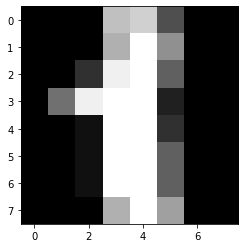

In [5]:
plt.imshow(X[1].reshape((8,8)), cmap='gray')
print(Y[1])
plt.show()

In [6]:
# Gray Scale Image 
# Only 1 Channel
# 0 - 15 (0-Black, 15-White, in Between Shades of Gray)

# These Are Discrete Values

# Train Models

In [7]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [8]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [9]:
# Train
mnb.fit(X, Y)
gnb.fit(X, Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
# Score
print(mnb.score(X, Y))
print(gnb.score(X, Y))

0.9053978853644964
0.8580968280467446


In [11]:
cross_val_score(gnb, X, Y, scoring="accuracy", cv=10).mean()

0.8113904407200497

In [12]:
cross_val_score(mnb, X, Y, scoring="accuracy", cv=10).mean()

0.8797858472998138

##### This is Because Each Feature is Discrete Valued ! Hence, MNB Gives Better Result

### Constructing and Visualising Confusion Matrix

In [13]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    """ This Function Prints and Plots The Confusion Matrix .
    Normalization Can Be Applied By Setting 'normalize=True' """
    
    if normalize:
        cm = (cm.astype('float') / cm.sum(axis=1))[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix (Without Normalisation)")
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()

In [14]:
Y_mnb = mnb.predict(X)
cnf_matrix = confusion_matrix(Y, Y_mnb)

In [15]:
# Note -> Diagonal Entries Represents, No. of Elements Where Predicted Class = Actual Class

In [16]:
print(cnf_matrix)

[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


In [17]:
classes_labels = np.arange(10)
print(classes_labels)

[0 1 2 3 4 5 6 7 8 9]


Confusion Matrix (Without Normalisation)


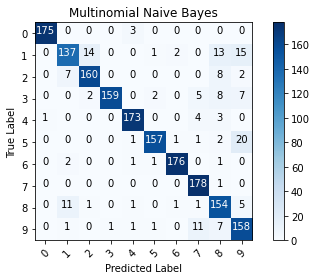

In [18]:
plot_confusion_matrix(cnf_matrix, classes=classes_labels, normalize=False, title="Multinomial Naive Bayes")

Confusion Matrix (Without Normalisation)


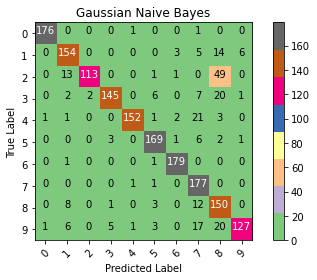

In [19]:
Y_gnb = gnb.predict(X)
cnf_matrix = confusion_matrix(Y, Y_gnb)
plot_confusion_matrix(cnf_matrix, classes=classes_labels, normalize=False, title="Gaussian Naive Bayes", cmap=plt.cm.Accent)